### **Making multiclass dataset**

In [6]:
import tensorflow as tf
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [7]:
n = 5
X = np.random.uniform(-5, 5, (n, 2))
print(X)

[[ 4.31164042  2.67877876]
 [-4.89473148 -0.73556311]
 [ 4.91331057  1.74748608]
 [-2.37596309  1.44243706]
 [ 4.17207805 -3.82742619]]


In [8]:
def make_data(n = 100):
    X = np.random.uniform(-5, 5, (n, 2))
    y = np.zeros(n)
    y[X[:,0]>X[:,1]] = 1
    y[X[:,0] < -2] = 2
    classes = [0, 1, 2]
    return X, y, classes

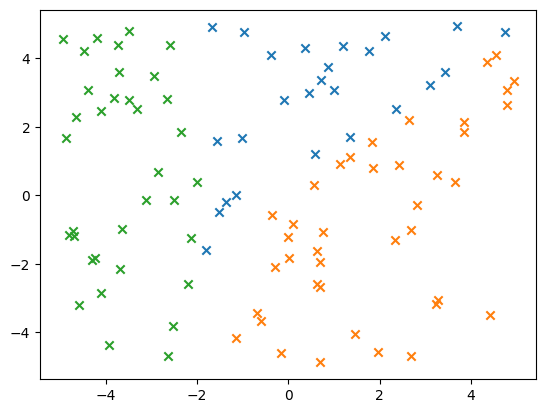

In [9]:
X, y, classes = make_data()
for c in classes:
    plt.scatter(X[y==c, 0], X[y==c, 1], marker = 'x')

### **Training model**

In [10]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(2),
        tf.keras.layers.Dense(3, activation = 'relu'),
        tf.keras.layers.Dense(3, activation = 'softmax')
    ]
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(learning_rate=1e-2))

In [13]:
model.fit(X, y, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.8779
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8312
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7940
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7605
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7237
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6954
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6679
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6449
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6238
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6037
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5841
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5665
Epoch 13/1000
4/4 [==============================

In [14]:
predictions = np.argmax(model.predict(X[5:15]), axis=1)

1/1 [==============================] - 0s 75ms/step


In [26]:
class MultiClassClassifierWrapper:
    def __init__(self, model):
        self.model = model
    def predict(self,X):
        predictions = np.argmax(model.predict(X), axis=1)
        return predictions

9600/9600 [==============================] - 11s 1ms/step


<AxesSubplot: >

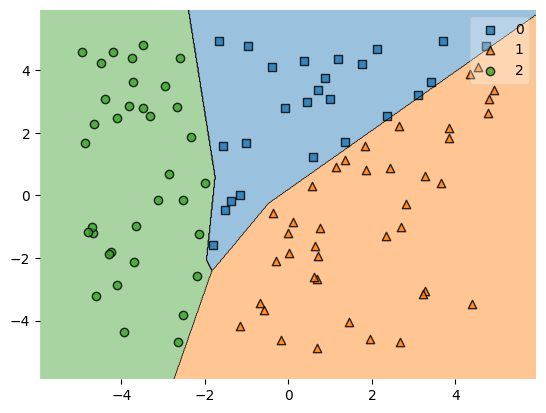

In [27]:
Model = MultiClassClassifierWrapper(model)
plot_decision_regions(X, y.astype(int), Model)

## **With from_logits = True**

### **Training model**

In [73]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(2),
        tf.keras.layers.Dense(2, activation = 'relu'),
        tf.keras.layers.Dense(3, activation = 'linear')
    ]
)

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer= tf.keras.optimizers.Adam(learning_rate=1e-2))

In [77]:
model.fit(X, y, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2517
Epoch 2/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2493
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2478
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2467
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2452
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2428
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2399
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2372
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2351
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2324
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2300
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2280
Epoch 13/1000
4/4 [==============================

In [78]:
model.predict(X[5:15])

1/1 [==============================] - 0s 48ms/step


array([[  -1.5590212 ,  -53.92638   ,   46.14305   ],
       [   0.63860387,    3.3240964 ,   -4.148905  ],
       [   3.369591  ,   -0.386271  ,   -3.3251705 ],
       [   2.1792843 ,  -43.382378  ,   34.054924  ],
       [  -0.8358962 ,    5.3273783 ,   -4.5936513 ],
       [  -2.5173867 ,   -3.2635555 ,    4.098883  ],
       [  -0.8358962 ,    5.3273783 ,   -4.5936513 ],
       [  28.122593  , -101.36722   ,   61.114365  ],
       [  16.459858  ,  -19.029816  ,    1.3497205 ],
       [  25.690826  ,  -72.55339   ,   38.80156   ]], dtype=float32)

In [79]:
np.argmax(model.predict(X[5:15]), axis=1)

1/1 [==============================] - 0s 20ms/step


array([2, 1, 0, 2, 1, 2, 1, 2, 0, 2], dtype=int64)

In [81]:
class MultiClassClassifierWrapper:
    def __init__(self, model):
        self.model = model
    def predict(self,X):
        predictions = np.argmax(model.predict(X), axis=1)
        return predictions

9600/9600 [==============================] - 10s 1ms/step


<AxesSubplot: >

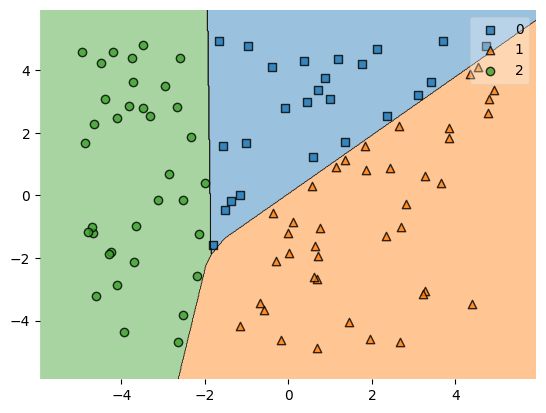

In [82]:
Model = MultiClassClassifierWrapper(model)
plot_decision_regions(X, y.astype(int), Model)